In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [111]:
ig=pd.read_csv(r'C:\Users\HP\Downloads\Income Data.csv')

In [113]:
ig.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [115]:
ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [117]:
ig.describe()

,income,age
count,300.000000,300.000000
mean,39538.000000,38.458667
std,16099.214422,7.523574
min,3100.000000,26.700000
25%,24800.000000,29.937500
50%,44450.000000,39.525000
75%,54125.000000,45.650000
max,60200.000000,50.400000


In [119]:
ig.corr()

,income,age
income,1.000000,-0.316462
age,-0.316462,1.000000


In [121]:
ig.isnull().sum()

income    0
age       0
dtype: int64

<Figure size 600x600 with 0 Axes>

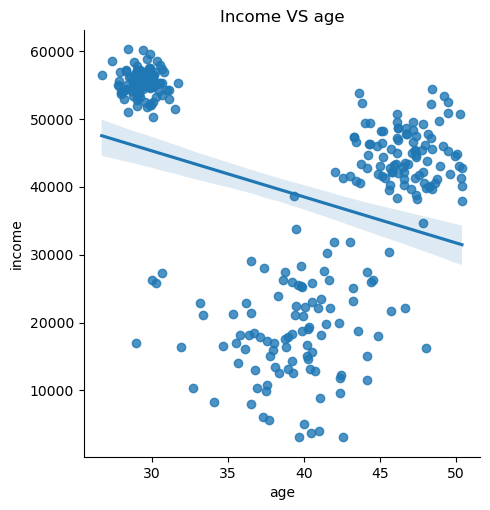

In [124]:
# visualize the data using lmplot
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='income', data=ig, fit_reg=True)
plt.title("Income VS age")
plt.show()

In [241]:
ig

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80
...,...,...
295,38300.0,46.10
296,27400.0,44.15
297,54200.0,28.25
298,41800.0,44.85


# Using KMeans 

In [587]:
# Without Using Sacling

In [581]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)

cluster_id=cluster.fit_predict(ig)

ig['cluster_id']=cluster_id

In [583]:
ig

,income,age,cluster_id
0,41100.0,48.75,2
1,54100.0,28.10,0
2,47800.0,46.75,2
3,19100.0,40.25,1
4,18200.0,35.80,1
...,...,...,...
295,38300.0,46.10,2
296,27400.0,44.15,1
297,54200.0,28.25,0
298,41800.0,44.85,2


<Figure size 600x600 with 0 Axes>

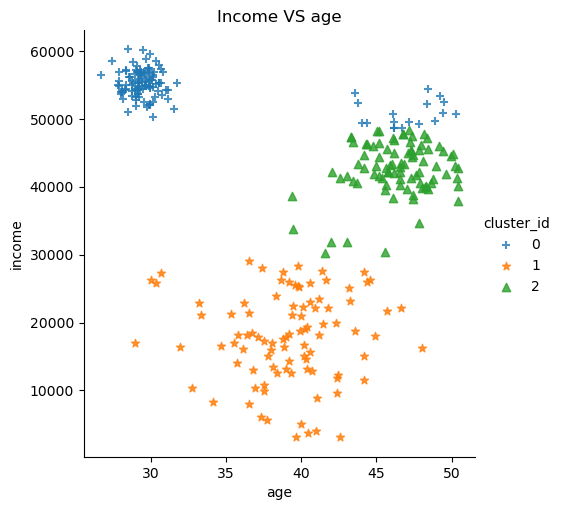

In [589]:
# plot the clusters  after scaling 
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='income', hue='cluster_id', markers=['+','*','^'], data=ig, fit_reg=False)
plt.title("Income VS age")
plt.show()

In [591]:
# elcow method

In [271]:
#elbow method
new_col=[]

for i in range(1,21):
    model=KMeans(n_clusters=i)
    model.fit(ig)
    new_col.append(model.inertia_)

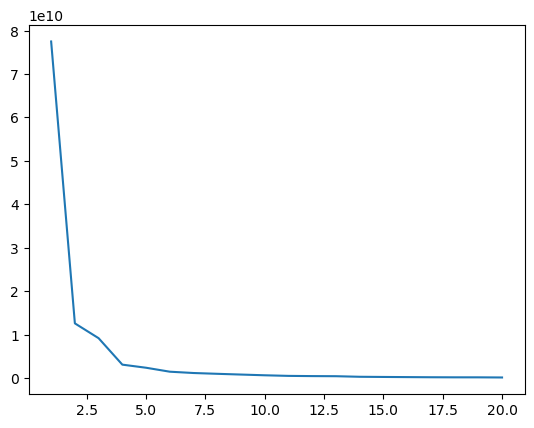

In [272]:
plt.plot(range(1,21),new_col)

In [300]:
# sacling Need

In [306]:
new_ig=ig.drop('cluster_id',axis=1)

In [308]:
new_ig

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80
...,...,...
295,38300.0,46.10
296,27400.0,44.15
297,54200.0,28.25
298,41800.0,44.85


In [593]:
from sklearn.preprocessing import MinMaxScaler

scling_ig=MinMaxScaler()

scling_new_ig=scling_ig.fit_transform(new_ig)

scaling_new=pd.DataFrame(scling_new_ig,columns=new_ig.columns)

scaling_new

,income,age
0,0.665499,0.930380
1,0.893170,0.059072
2,0.782837,0.845992
3,0.280210,0.571730
4,0.264448,0.383966
...,...,...
295,0.616462,0.818565
296,0.425569,0.736287
297,0.894921,0.065401
298,0.677758,0.765823


In [595]:
cluster_new = KMeans(n_clusters=3)

cluster_id=cluster_new.fit_predict(scaling_new)

scaling_new['cluster_id']=cluster_id

In [374]:
scaling_new

,income,age,cluster_id
0,0.665499,0.930380,2
1,0.893170,0.059072,1
2,0.782837,0.845992,2
3,0.280210,0.571730,0
4,0.264448,0.383966,0
...,...,...,...
295,0.616462,0.818565,2
296,0.425569,0.736287,0
297,0.894921,0.065401,1
298,0.677758,0.765823,2


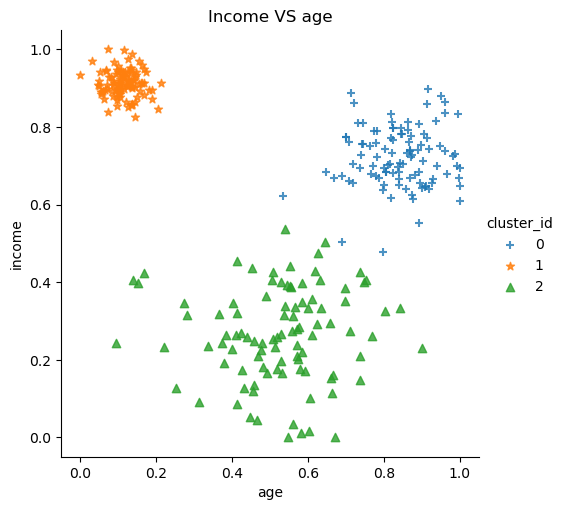

In [597]:
    sns.lmplot(data=scaling_new,x='age',y='income',hue='cluster_id',fit_reg=False,markers=['+','*','^'])
    plt.title("Income VS age")
    plt.show()

In [360]:
#elbow method
new_col=[]

for i in range(1,21):
    model1=KMeans(n_clusters=i)
    model1.fit(scaling_new)
    new_col.append(model1.inertia_)



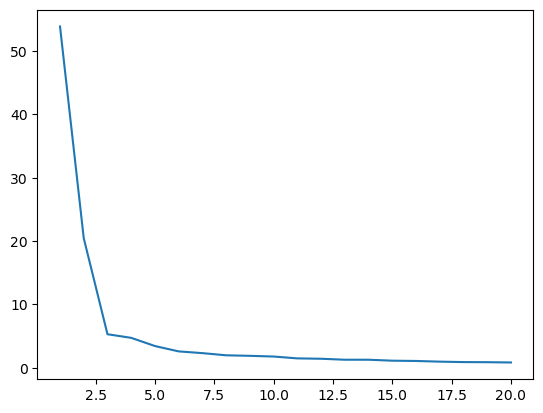

In [362]:
plt.plot(range(1,21),new_col)

In [397]:
#check point fits within its cluster
from sklearn.metrics import silhouette_score

silhouette_score(scaling_new,scaling_new['cluster_id'])

0.8808533399964835

# Using DBSCAN

In [456]:
# Using DBSCAN algorithm on the dataset
from sklearn.cluster import DBSCAN


In [460]:
scaling_new.drop("cluster_id",axis=1,inplace=True)

In [466]:
scaling_new.drop("cluster_id_agg",axis=1,inplace=True)

In [468]:
scaling_new

,income,age
0,0.665499,0.930380
1,0.893170,0.059072
2,0.782837,0.845992
3,0.280210,0.571730
4,0.264448,0.383966
...,...,...
295,0.616462,0.818565
296,0.425569,0.736287
297,0.894921,0.065401
298,0.677758,0.765823


In [601]:
scling_db =DBSCAN(eps=0.2, min_samples=10)

dbscan_data=scling_db.fit_predict(scaling_new)

scaling_new['cluster_db']=dbscan_data

In [603]:
scaling_new

,income,age,cluster_id,cluster_db
0,0.665499,0.930380,0,0
1,0.893170,0.059072,1,1
2,0.782837,0.845992,0,0
3,0.280210,0.571730,2,2
4,0.264448,0.383966,2,2
...,...,...,...,...
295,0.616462,0.818565,0,0
296,0.425569,0.736287,2,2
297,0.894921,0.065401,1,1
298,0.677758,0.765823,0,0


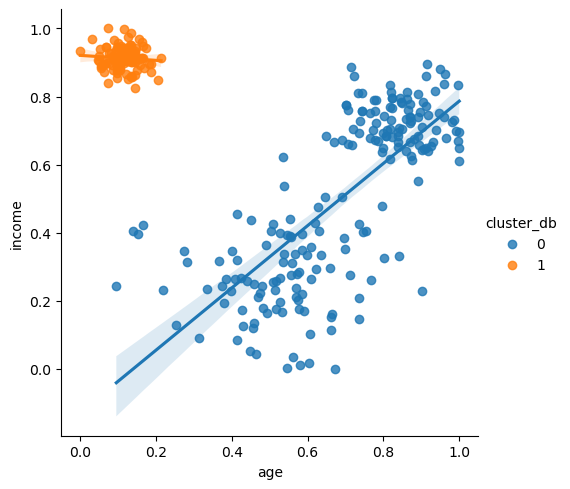

In [510]:
sns.lmplot(data=scaling_new, x='age',y='income',hue='cluster_db')
plt.show()

In [514]:
from sklearn.metrics import silhouette_score

In [516]:
silhouette_score(scaling_new,scaling_new['cluster_db'])

0.7797457159221975

In [518]:
X = scaling_new.drop("cluster_db", axis=1)
eps_list = [0.1,0.2,0.3,0.4,0.5]
sample_list = [x for x in range(1,11)]

lables = []
tuple_pairs = []

for i in eps_list:
    for j in sample_list:
        db1 = DBSCAN(eps=i, min_samples=j)
        db1.fit(X)
        labels = db1.labels_
        tupl = tuple([i,j])
        lables.append(labels)
        tuple_pairs.append(tupl)

lables_df1 = pd.concat([pd.Series(x) for x in lables], axis=1)
new_df1 = pd.concat([X,lables_df1], axis=1)
new_df1.shape

(300, 52)

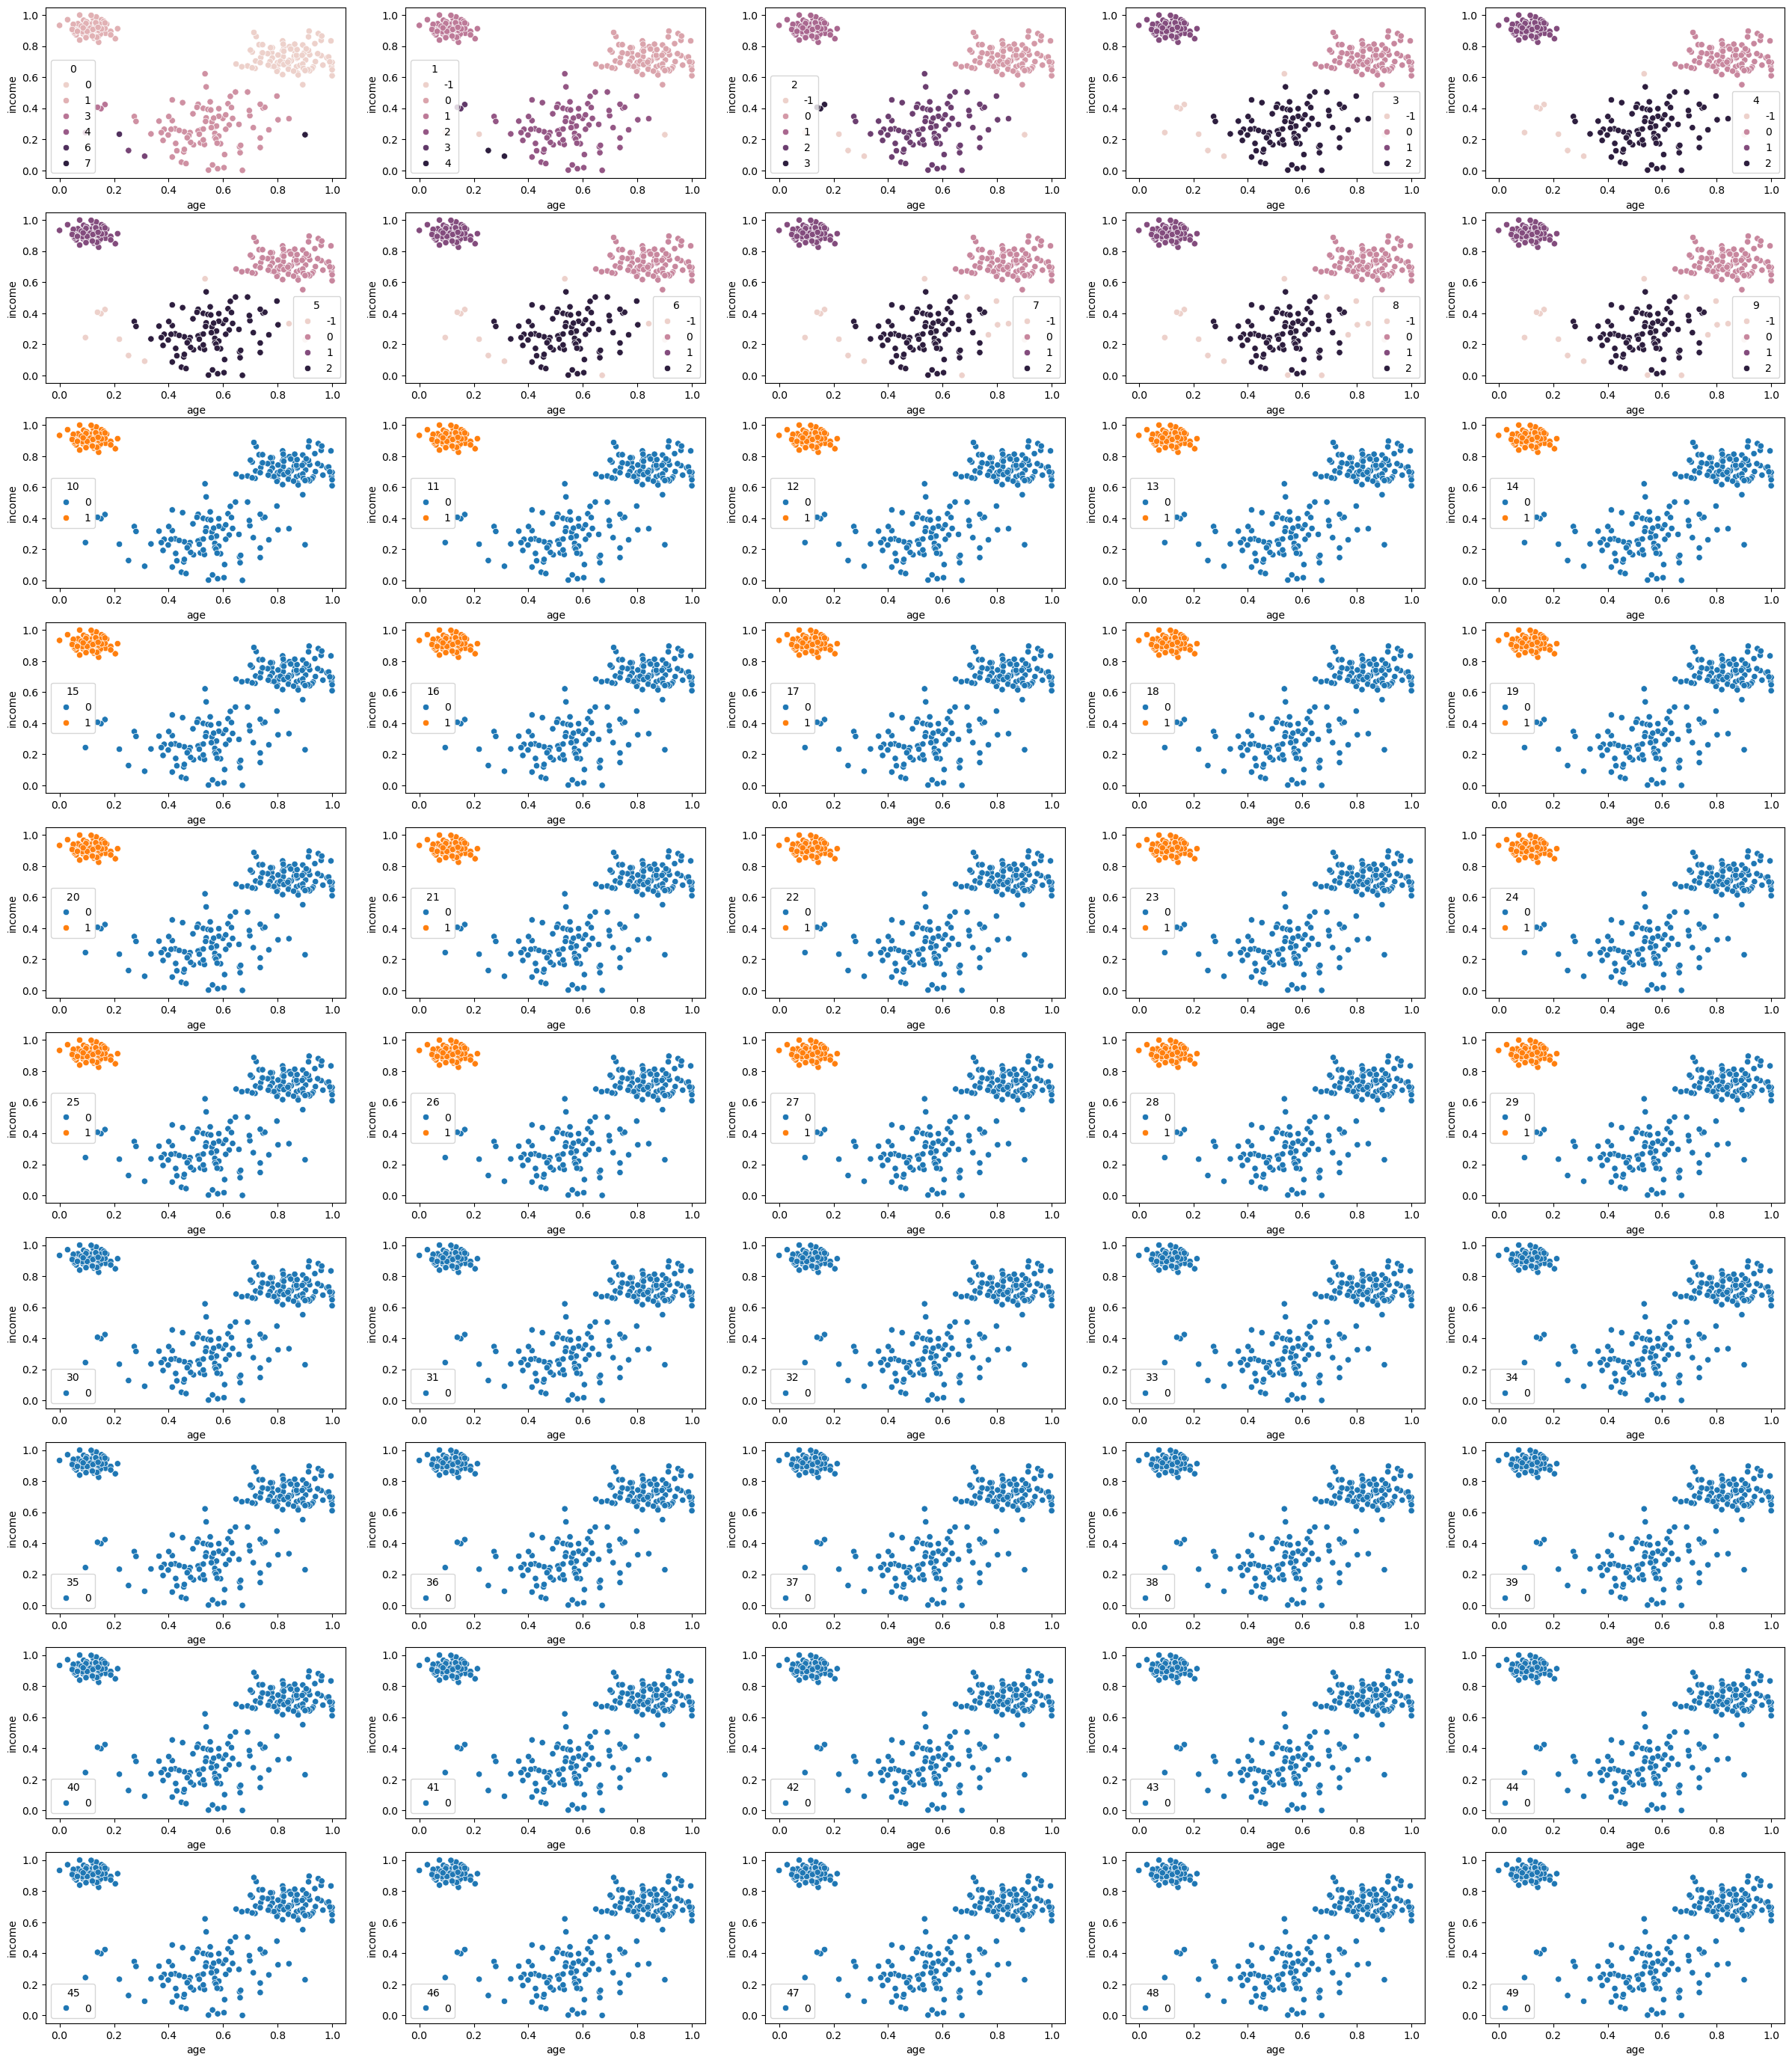

In [522]:
# plot all 50 clusters
plt.figure(figsize=(30,35))
for i in range(0,50):
        plt.subplot(10,5,i+1)
        sns.scatterplot(x='age', y='income', hue=i, data=new_df1)
plt.show()

# Conclusions:

 1) K-means work based on euclidean distance metric and create clusters by iterating over data with number of clusters assigned to the algorithm.

2) While, DBSCAN works on dense samples to create clusters so it is used for highly densed data not for features with high variations.